#  Capstone Project - The Battle of Neighborhoods ( Week 2)

 <div class="alert alert-block alert-info" style="margin-top: 20px"> 
    
 ## Table of contents
    
1. [Introduction](#introduction)    
2. [Data Acquisition](#data)
3. [Methodology](#methodology)
4. [Data Acquisition](#data_acquisition)
5. [Analysis And Visualization](#data_analysis)
6. [Modelling](#model)
7. [Results and Prediction](#result)
8. [Conclusion](#conclusion)
9. [Further Development](#further)


## Introduction <a name ="introduction"></a>

**LIDL** is one of the cheapest super market in Europe but it's not represented in many European cities, specially in Scandinavian countries such as Denmark. Surprisingly, the last five years, **LIDL Group** have started to build several **LIDL Supermarket** in different regions of Denmark and specially the north of Denmark called **Nordjylland** in Danish language. Therefore, the purpose of this capstone project is to investigate and find out where the next **LIDL Supermarket** will be built in **Aalborg** the main city of **Nordjylland**.
The target audience is Aalborg Municipality or borough and the stakeholders are of course **LIDL Group**, the main competitors such as **Rema1000**, **Føtex**, **Fakta**, **ALDI** and **Aalborg City**

## Data <a name ="data"></a>

To Tackle or solve this problem, I will of course need a Dataset, which will find and locate all the existing  **Lidl** Supermarket and main competitors which already exist in Nordjylland region. I do not have an existing dataset for this problem. For that reason, **Foursquare API ** will be used in order to create a proper dataset that will be used to solve the problem. The dataset will certainly contain:
* All main competitors such as **Rema1000**, **Føtex**, **Fakta**, **ALDI**   and their location
* All the existing **LIDl** supermarket, their geographic location and the distance from the main city.
* Aalborg borough or neighborhood, the population and the number of person per km2.

## Methodology <a name ="methodology"></a>

Having explained the problem to solve and described the type of dataset that will be used, the next section will include the following steps:
* Acquisition of the data by using Foursqaure in our case;
* Present an overview of data
* Perform some exploratory Data Analysis (EDA) to find some pattern in dataset and have an idea of  what kind of useful Machine learning can be suitable  to solve problem
* Build a model
* Test and explain the result.

### Data  Acquition <a name ="data_acquisition"></a>

As mentioned in `Data` section, I do not have an existing dataset to solve the mentioned problem. To collect the necessary datasets, **Foursquare Api** will be used.

In order to define an instance of the geocoder, we need to define a `user_agent`. We will name our agent `foursquare_agent` and define the `address` and the `search_query`, which will be associated with a valid `Foursquare` developer credentials. The  user credentials and  Foursquare Api are in the following forms:

In [49]:
#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
#VERSION = '20180604'
#LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

In order to find the location of a specific point of interst, the following code blocks have been used.

In [50]:
# This function will get the location of a specific region of interest POI.
def get_address(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

Assuming that we are living in **Aalborg City** and we  need the near  **Rema1000** supermarket, one can use the following few of code to request the `json` file that contains the location of  all the near **Rema1000** supermarket.

In [52]:
address = 'Aalborg'
get_address(address) # Get the address of a specific point of interst
search_query = 'Rema1000'
radius =50000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

57.0482206 9.9193939


In order  to convert the `json` file  to `pandas DataFrame` and filter the venues, the following function can be used

In [53]:
def format_requests_result(results):
    # keep only columns that include venue name, and anything that is associated with location
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dataframe_filtered = dataframe_filtered.drop(columns = ['formattedAddress','country', 'id','state', 'cc','labeledLatLngs'])
    return dataframe_filtered

After the above-mentioned steps, one can get the  final dataset that can be used to investigate and solve the problm. The final dataset that contains **Lidl** and it's competitors. 

In [54]:
df = rema_lidl_føtex_df.append(fakta_df, ignore_index= True, sort= False)
df.dropna( axis = 0, inplace = True)
df.sort_values('name', ascending = True)
df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


### Data  Analysis and Visualization<a name ="data_analysis"></a>

After Data wrangling or Data munging, I will now perform some exploratory Data analysis (EDA) and visualization for a better understanding dataset and try to find which Machine Learning algorithm can be suitable to for this kind of problem.

In [55]:
df_num_of_supermarket = df.groupby(['name'])['postalCode'].count().reset_index()
df_num_of_supermarket

,name,postalCode
0,Fakta,26
1,Føtex,14
2,Lidl,9
3,REMA 1000,37


Surprisingly, after a simple grouping by postalCol I realized that there are more `REMA 1000` in Aalborg city than any other supermarket while there is only **9 Lidl** supermarket. To find out where they are located, one can perform the following query

In [56]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,name,categories,address,city,distance,lat,lng,postalCode
41,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
45,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
46,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


One can read from the table above that there is only **One (1) Lidl** store in the main city **Aalborg**,**5 of the 8** remaining stores are located very far from Aalborg center. The reasons of this choice are multiples and We will enumerate some of them in next sections. One can also Visualize all supermarkets in **Nordjylland** 

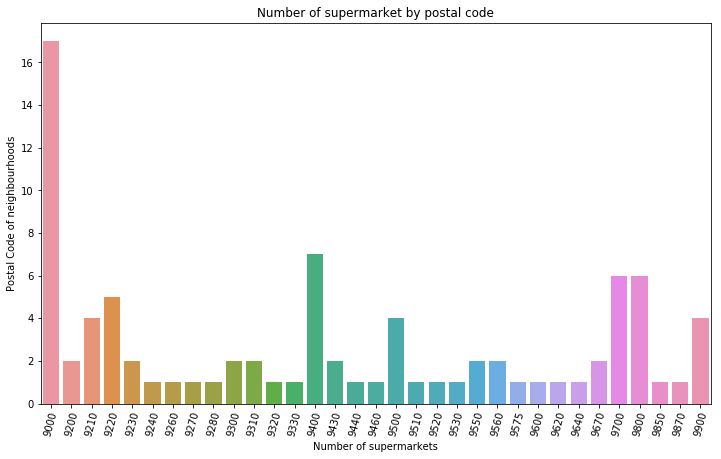

In [57]:
df_bar = df.groupby('postalCode')['name'].count().reset_index()
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
ax = sns.barplot(x = 'postalCode', y = 'name', data=df_bar)
ax.set(xlabel='Number of supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of supermarket by postal code')
plt.show(ax)

Number of **LiDL**  in Aalbrog are presented in the following figure:

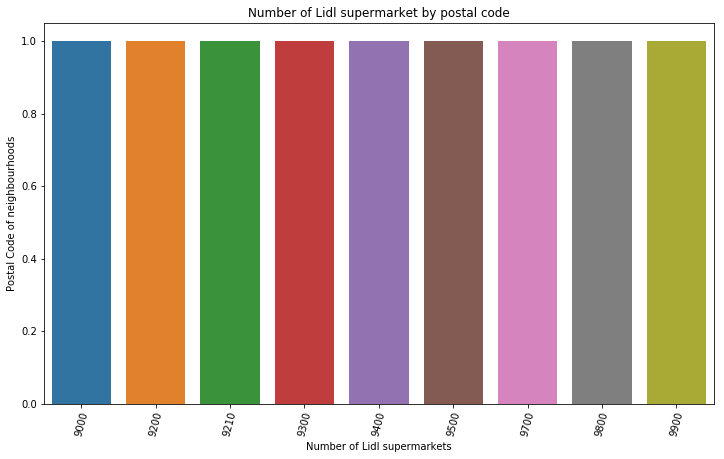

In [58]:
lidl_filtered_df = df[df['name'] == 'Lidl']
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
ax = sns.countplot(x = 'postalCode', data=lidl_filtered_df)
ax.set(xlabel='Number of Lidl supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of Lidl supermarket by postal code')
plt.show(ax)

From this graph one can understand that **LIDL** have decided to build only one **Supermarket** per neighbourhood (by Postal code).The reason of this choice can be very difficult to understand specially where in main **City** where we can find only **One(1) LIDl** of 17.

The number of **supermarket** in Aalborg city.

In [59]:
df_9000 = df[df['postalCode'] == "9000"].groupby(['name'])['postalCode'].count().reset_index(inplace = False)
df_9000.sort_values('postalCode', ascending = False)

,name,postalCode
3,REMA 1000,6
0,Fakta,5
1,Føtex,5
2,Lidl,1


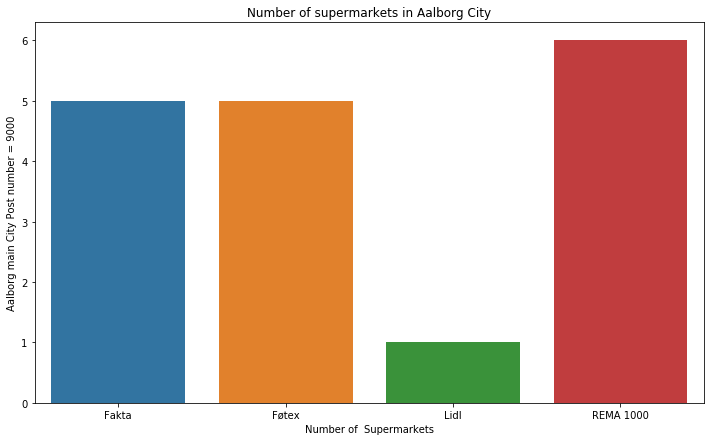

In [60]:
plt.figure(figsize=(12,7))
ax = sns.barplot( x = 'name', y= 'postalCode', data=df_9000)
ax.set(xlabel='Number of  Supermarkets', ylabel='Aalborg main City Post number = 9000', title='Number of supermarkets in Aalborg City')
plt.show(ax)

Now one can   Create a map of Aalborg with The Suppermarkets their locations and postalCode of neighbourhood  using **folium**

In [33]:
# create map of New York using latitude and longitude values
map_aalborg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(df['lat'], df['lng'], df['name'], df['address'], df['postalCode']):
    label = '{} ,{}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        tooltip = "Essai",      
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_aalborg)  
    
map_aalborg

Now we  try to isolate **Lidl** and see the different locations on map and the distance from the main  center **City Aalborg**

In [61]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,name,categories,address,city,distance,lat,lng,postalCode
41,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
45,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
46,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


In [62]:
# create map of New York using latitude and longitude values
map_lidl = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(lidl_filtered_df['lat'], lidl_filtered_df['lng'], lidl_filtered_df['name'], lidl_filtered_df['address'], lidl_filtered_df['postalCode']):
    label = '{}, {}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lidl)  
    
map_lidl

### Modelling  <a name ="model"></a>

Having a better understanding dataset, an unsupervised Machine learning is a suitable to find to solve this problem. Therefore, in next step, I will build  a **k-means** algorithm using the loaction data and the distance. For this purpose I will filter the dataset and use the following  methods

In [63]:
from sklearn.cluster import KMeans
kclusters = 4 #I choose the number of cluster to see how the 4 supermarket are presented in Aalborg

clust_data = df.drop(['name','city', 'categories', 'address', 'postalCode'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clust_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster to the dataset.

In [64]:
df['cluster_labels'] = kmeans.labels_
df.head()

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400,0
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000,0
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000,0
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000,0
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220,0


In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for s_name, lat, lon, poi, cluster in zip(df['name'],df['lat'], df['lng'], df['address'], df['cluster_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'cm' is not defined

### Examine Clusters

Now we can examene the clusters as the following:

In [67]:
df.loc[df['cluster_labels'] == 0].head() # this the dataframe for the first cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400,0
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000,0
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000,0
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000,0
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220,0


In [69]:
df.loc[df['cluster_labels'] == 1].head() # this the dataframe for the second cluster and the Supermarkets assigned to it

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
23,REMA 1000,Discount Store,Th. Eriksens Vej 20,Farsø,46662,56.772094,9.341709,9640,1
25,REMA 1000,Discount Store,Sophus Falcks Vej 2,Sæby,47433,57.332067,10.505896,9300,1
27,REMA 1000,Grocery Store,Gl. Hobrovej 2,Mariager,44825,56.646709,9.975271,9550,1
28,REMA 1000,Discount Store,Gl. Hobrovej 2,Mariager,44825,56.646688,9.974918,9550,1
30,REMA 1000,Discount Store,Testrupvej 2 A,Ålestrup,47024,56.696455,9.491400,9620,1


In [71]:
df.loc[df['cluster_labels'] == 2].head() # this the dataframe for the third cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
15,REMA 1000,Discount Store,Østergade 24,Brovst,24415,57.097072,9.526042,9460,2
16,REMA 1000,Discount Store,Hobrovej 90,Støvring,18427,56.888925,9.836783,9530,2
20,REMA 1000,Discount Store,Markedsvej 125,Brønderslev,25026,57.271540,9.967250,9700,2
24,REMA 1000,Discount Store,Skovglimt 2,Hjallerup,18950,57.167480,10.143100,9320,2
26,REMA 1000,Discount Store,Sdr Omfartsvej 2,Brønderslev,25233,57.274885,9.923222,9700,2


In [72]:
df.loc[df['cluster_labels'] == 3] # this the dataframe for the fourth cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
19,REMA 1000,Discount Store,Gærumvej 36,Frederikshavn,55383,57.427550,10.514285,9900,3
29,REMA 1000,Discount Store,Banegårdspladsen 13,Hirtshals,60518,57.591399,9.961140,9850,3
39,REMA 1000,Discount Store,Hjørringvej 33,Frederikshavn,57469,57.447671,10.523934,9900,3
40,REMA 1000,Discount Store,Kragholmen 3,Frederikshavn,57532,57.440680,10.540933,9900,3
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900,3


## Results and Prediction  <a name ="result"></a>
The cluster analysis show that many of **Supermarket** are located in the main City **Aalborg** but this is not the case when we consider **Lidl**, which is our target for this project. When we look at the first ** Cluster** which represent the group of clusters gethered in main City with  Postal code between ** 9000 to 9430**. There are  ** 4 Lidl ** assigned to this cluster and only one of them is located in main center with **PostalCode 9000**. I have also discovered that  each **Lidl supermarket** has different location very far from each other.
According to the results from the different data analysis combined with  cluster analysis, ** I Will advise Lidl Group** to build the next **Lidl** supermarket in the main city area (postalCode 9000) near by the competitors, which are already concentrated in this area. Of course the completion will be very hard but the quality and price difference will play in favor of **Lidl**. Another factor that can play in favor of **Lidl** is that it's more international in contrast of its competitors which are more national based.
As the population is growing in main city,**Lidl** group can also can also think about how to increase the customers in main city.

## Conlusion and Discussions <a name ="conclusion"></a>
The main purpose of this project was to investigate where ** Lidl Goup ** will build the next **Lidl** supermarket in order to help stakeholders in their decision to find the optimal location for the next **Lidl** supermarket in **Nordjylland**. Having an EDA and clustering according to the different locations and the their distance to city center I came to the conclusion that the next **Lidl** should find a place closer to city center. However, the final decision will made by the different stakeholders based on specific characteristics that are not investigated in this project.


## Further Development <a name = "further"></a>
The following are suggestions about how this project could be further implemented:
1. Integrate communal plan with the growth of population 
2. Using more automated AI tools form better performance of the algorithm

# Import the necsary libraries 

In [2]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns # data visualisation and modelling
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Define Foursquare Credentials and Version

In [47]:
CLIENT_ID = 'Y5HACAVLRW3Q5GIHJLX4AAZGZAGAXDBMW243Q54KPUPYZLSS' # your Foursquare ID
CLIENT_SECRET = 'WWLJH05WFMDIGJGULGKTLE2ZS5TCJRSFDACB5TSSHNOR12C0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 # this can go up to 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y5HACAVLRW3Q5GIHJLX4AAZGZAGAXDBMW243Q54KPUPYZLSS
CLIENT_SECRET:WWLJH05WFMDIGJGULGKTLE2ZS5TCJRSFDACB5TSSHNOR12C0


In order to define an instance of the geocoder, we need to define a `user_agent`. We will name our agent <em>foursquare_agent</em> and define the  `address and the search_query` which will be associated with  above mentioned creditentiels. The form of specific category is of the following from:

> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

Now we try to find a specific supermarket call  `Rema1000`

In [4]:
def get_address(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

In [5]:
#address = '102 North End Ave, New York, NY'
#address = 'Aalborg, 9000'
address ='Aalborg'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

57.0482206 9.9193939


In [6]:
address = 'Aalborg'
get_address(address) # Get the address of a specific point of interst
search_query = 'Rema1000'
radius =50000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

57.0482206 9.9193939


In [7]:
def format_requests_result(results):
    # keep only columns that include venue name, and anything that is associated with location
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dataframe_filtered = dataframe_filtered.drop(columns = ['formattedAddress','country', 'id','state', 'cc','labeledLatLngs'])
    return dataframe_filtered

In [10]:
rema1000_df = format_requests_result(results)
rema1000_df.drop('crossStreet', axis =1, inplace = True)
clean_store_name('name', rema1000_df, 'REMA 1000')
rema1000_df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


# Lidl DataFrame

In [12]:

address = 'Aalborg'
get_address(address)
search_query = 'Lidl'
radius =50000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
lidl_results = requests.get(url).json()
lidl_df = format_requests_result(lidl_results)
lidl_df.drop('crossStreet', axis =1, inplace = True)
clean_store_name('name',lidl_df, 'Lidl')
lidl_df.head()

57.0482206 9.9193939


,name,categories,address,city,distance,lat,lng,postalCode
0,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
1,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
2,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
3,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
4,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200


Join Dataframe

In [14]:
rema_lidl_df = rema1000_df.append(lidl_df, ignore_index= True)
rema_lidl_df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


# Føtex DataFrame

In [15]:
address = 'Aalborg'
get_address(address)
search_query = 'Føtex'
radius =50000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
føtex_results = requests.get(url).json()

57.0482206 9.9193939


In [16]:
føtex_df = format_requests_result(føtex_results)
clean_store_name('name',føtex_df, 'Føtex')
føtex_df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,Føtex,Supermarket,Synergivej 5,Aalborg,1601,57.036823,9.935540,9000
1,Føtex,Supermarket,Vestergade 30,Nørresundby,1294,57.059831,9.918082,9400
2,Føtex,Supermarket,Slotsgade 8,Aalborg,333,57.047505,9.924750,9000
3,Føtex,Bistro,Slotsgade 8,Aalborg,327,57.047240,9.924501,9000
4,Føtex,Mobile Phone Shop,Slotsgade 8-14,Aalborg,471,57.048071,9.927178,9000


In [17]:
rema_lidl_føtex_df = rema_lidl_df.append(føtex_df, ignore_index = True, sort =False)
rema_lidl_føtex_df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


In [18]:
address = 'Aalborg'
get_address(address)
radius =50000
search_query = 'Fakta'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
fakta_results = requests.get(url).json()
fakta_df = format_requests_result(fakta_results)
fakta_df.drop('crossStreet', axis =1, inplace = True)
clean_store_name('name', fakta_df, 'Fakta')
fakta_df.head()


57.0482206 9.9193939


,name,categories,address,city,distance,lat,lng,postalCode
0,Fakta,Grocery Store,Vestre Alle 13,Aalborg,1747,57.034044,9.906993,9000
1,Fakta,Grocery Store,Alexander Foss Gade 10,Aalborg,1713,57.035144,9.934309,9000
2,Fakta,Grocery Store,Østerbrogade 54,Nørresundby,1126,57.057933,9.924600,9400
3,Fakta,Grocery Store,Thulebakken 42,Aalborg,2503,57.035799,9.884941,9000
4,Fakta,Grocery Store,Forbindelsesvejen 148,Nørresundby,2902,57.070182,9.945253,9400


In [19]:
df = rema_lidl_føtex_df.append(fakta_df, ignore_index= True, sort= False)
#df.drop('crossStreet', axis =1, inplace = True)
df.dropna( axis = 0, inplace = True)
df.sort_values('name', ascending = True)
df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


After Data wrangling, I will now perform some exploratory Data analysis and visualization for a better understanding dataset and try to find which Machine Learning algorithm can be suitable to for this kind of problem.

In [145]:
df_num_of_supermarket = df.groupby(['name'])['postalCode'].count().reset_index()
df_num_of_supermarket

,name,postalCode
0,Fakta,26
1,Føtex,14
2,Lidl,9
3,REMA 1000,37


Surprisingly, After a simple groupering by postalCol I realised that there are more `REMA 1000` in Aalborg city than any  other supermarket while there is only  **9 Lidl** supermarket. To find out where thsey are located, one can perform the following query.

In [146]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
41,0,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,0,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,0,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,0,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
45,2,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
46,1,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,1,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,1,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,3,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


One can read from the table above that there is only **One (1) Lidl** store in the main city **Aalborg**, **5 of the 8** remaining stores are located very far from Aalborg center. The reasons of this choice are multiples. .... 

One can also Visualize all **suppermarket** in Aalborg city and see their locations.

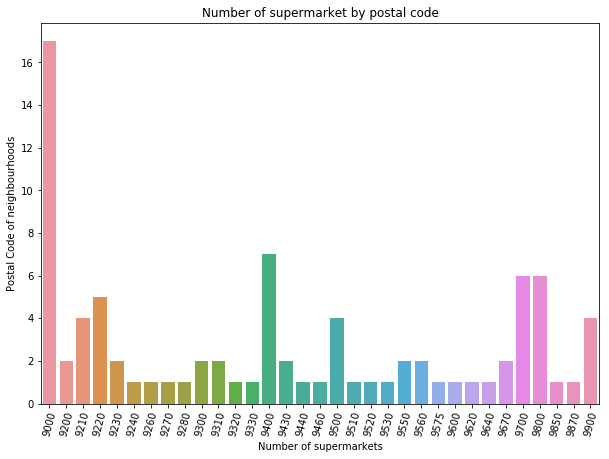

In [23]:
df_bar = df.groupby('postalCode')['name'].count().reset_index()
plt.figure(figsize=(10,7))
plt.xticks(rotation=75)
ax = sns.barplot(x = 'postalCode', y = 'name', data=df_bar)
ax.set(xlabel='Number of supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of supermarket by postal code')
plt.show(ax)

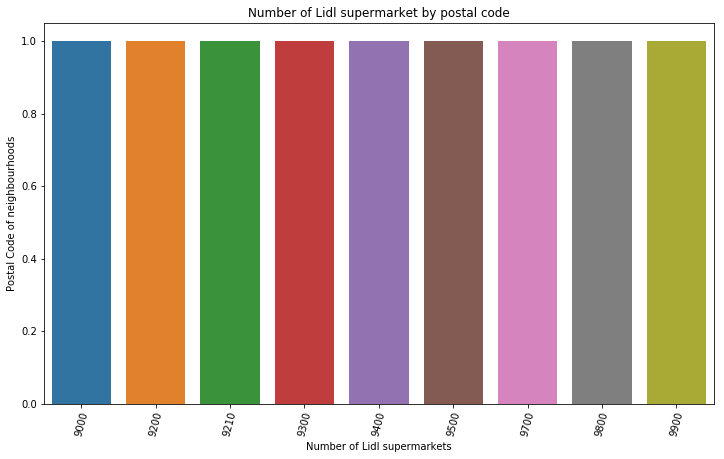

In [25]:
lidl_filtered_df = df[df['name'] == 'Lidl']
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
ax = sns.countplot(x = 'postalCode', data=lidl_filtered_df)
ax.set(xlabel='Number of Lidl supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of Lidl supermarket by postal code')
plt.show(ax)

The number of **suppermarket** in Aalborg city.

In [39]:
df_9000 = df[df['postalCode'] == "9000"].groupby(['name'])['postalCode'].count().reset_index(inplace = False)
df_9000.sort_values('postalCode', ascending = False)

,name,postalCode
3,REMA 1000,6
0,Fakta,5
1,Føtex,5
2,Lidl,1


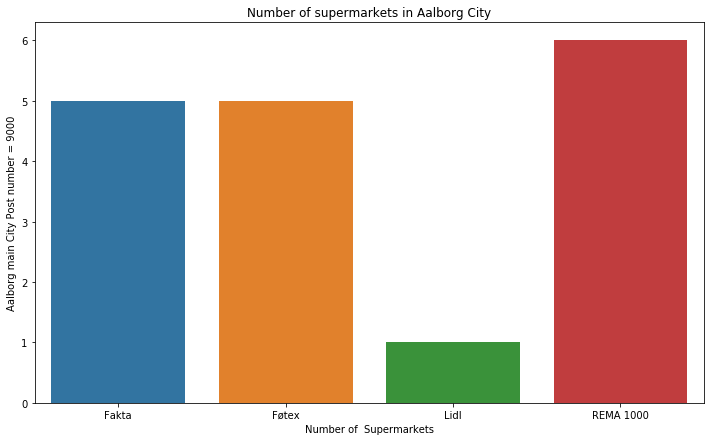

In [158]:
plt.figure(figsize=(12,7))
ax = sns.barplot( x = 'name', y= 'postalCode', data=df_9000)
ax.set(xlabel='Number of  Supermarkets', ylabel='Aalborg main City Post number = 9000', title='Number of supermarkets in Aalborg City')
plt.show(ax)

It seems that **Lidl Group** have decided to build **One (1)** store in every neighbourhood town en Aalborg region

Now Create a map of Aalborg with  **The Suppermarket** location and postalCode  using folium

In [159]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [161]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(df['lat'], df['lng'], df['name'], df['address'], df['postalCode']):
    label = '{}, {}'.format(postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        tooltip = "essai",   
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

TypeError: __init__() got an unexpected keyword argument 'tooltip'

In [29]:
# create map of New York using latitude and longitude values
map_aalborg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(df['lat'], df['lng'], df['name'], df['address'], df['postalCode']):
    label = '{} ,{}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        tooltip = "Essai",      
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_aalborg)  
    
map_aalborg

In [123]:
def color(icon_color):  # this will change the color of the icons
    if s_name =='Lidl':
        icon_color ='yellow'
    return icon_color     
    

Now try to isolate `Lidl`  and see how it is location and distance from the center of City **Aalborg**

In [162]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
41,0,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,0,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,0,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,0,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
45,2,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
46,1,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,1,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,1,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,3,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


In [163]:
# create map of New York using latitude and longitude values
map_lidl = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(lidl_filtered_df['lat'], lidl_filtered_df['lng'], lidl_filtered_df['name'], lidl_filtered_df['address'], lidl_filtered_df['postalCode']):
    label = '{}, {}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lidl)  
    
map_lidl

Convert columns `name  and postalCode` to categorycal  attribute

In [126]:
df['name'] = df['name'].astype('category')
df['postalCode'] = df['postalCode'].astype('category')

In [127]:
df.dtypes

name          category
categories      object
address         object
city            object
distance         int64
lat            float64
lng            float64
postalCode    category
dtype: object

In [9]:
def clean_store_name(col, df_store,store_name): # clean the rows to have unique name  example : Rema 1000, Fakta,Lidl .....
    for i in range(1, df_store.shape[0]):
        if([df_store[col] != store_name]):
            df_store[col] = store_name
   

According the form of the dataset and the Explorotory Data analysis, an unsupervised Machine learning is a suitable to find to solve this problem. Therefore, in  next step, I will duild a `k-means` algorithm using the loaction data and the distance. For this purpose I will filter the dataset as following:

In [164]:
clust_data = df.drop(['name','city', 'categories', 'address', 'postalCode'], axis = 1)
clust_data.head()

,cluster_labels,distance,lat,lng
0,0,1255,57.059502,9.919370
1,0,723,57.042319,9.924412
2,0,1054,57.046191,9.936409
3,0,2562,57.029152,9.943098
4,0,5300,57.040576,10.005793


In [44]:
from sklearn.cluster import KMeans
kclusters = 4 #I choose the number of cluster to see how the 4 supermarket are presented in Aalborg

clust_data = df.drop(['name','city', 'categories', 'address', 'postalCode'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clust_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster to the dataset.

In [45]:

df['cluster_labels'] = kmeans.labels_
# df.insert(0, 'cluster_labels', kmeans.labels_)
# df.head(10)
df.head()

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400,0
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000,0
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000,0
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000,0
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220,0


In [48]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for s_name, lat, lon, poi, cluster in zip(df['name'],df['lat'], df['lng'], df['address'], df['cluster_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'cm' is not defined

In [176]:
clust_lidl= df['name'] == "Lidl"
df_lidl_clust = df[clust_lidl]
df_lidl_clust


,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
41,0,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,0,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,0,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,0,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
45,2,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
46,1,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,1,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,1,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,3,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 0

In [104]:
df.loc[df['cluster_labels'] == 0] #df.columns[[1] + list(range(4,df.shape[1]))]]


,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
0,0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,0,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,0,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,0,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,0,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220
5,0,REMA 1000,Discount Store,Nibevej 308,Aalborg,7670,57.007081,9.817824,9200
6,0,REMA 1000,Discount Store,Hasseris Bymidte 4,Aalborg,2570,57.036892,9.882413,9000
7,0,REMA 1000,Discount Store,Vejgaard Bymidte 8,Aalborg,1914,57.042079,9.948921,9000
8,0,REMA 1000,Grocery Store,Ellehammersvej 84,Vadum,8808,57.121123,9.862761,9430
9,0,REMA 1000,Discount Store,Gugvej 211,Aalborg,4398,57.008953,9.927434,9210


#### Cluster 1

In [101]:
df.loc[df['cluster_labels'] == 1] #df.columns[[1] + list(range(4,df.shape[1]))]]

,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
23,1,REMA 1000,Discount Store,Gl. Hobrovej 2,Mariager,44825,56.646688,9.974918,9550
25,1,REMA 1000,Discount Store,Sophus Falcks Vej 2,Sæby,47433,57.332067,10.505896,9300
26,1,REMA 1000,Discount Store,Th. Eriksens Vej 20,Farsø,46662,56.772094,9.341709,9640
28,1,REMA 1000,Grocery Store,Gl. Hobrovej 2,Mariager,44825,56.646709,9.975271,9550
30,1,REMA 1000,Discount Store,Testrupvej 2 A,Ålestrup,47024,56.696455,9.491400,9620
31,1,REMA 1000,Discount Store,Søndergade 36,Aars,36623,56.801836,9.519889,9600
33,1,REMA 1000,Discount Store,Jernbanegade 6,Hadsund,38734,56.718014,10.120227,9560
34,1,REMA 1000,Discount Store,Odinsvej 2,Hjørring,44692,57.447640,9.994522,9800
35,1,REMA 1000,Discount Store,Mariagervej 3,Hobro,46668,56.633997,9.801229,9500
36,1,REMA 1000,Discount Store,Hestkærvej 1,Hjørring,45789,57.456545,10.011264,9800


#### Cluster 2

In [102]:
df.loc[df['cluster_labels'] == 2] #df.columns[[1] + list(range(4,df.shape[1]))]]

,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
14,2,REMA 1000,Discount Store,Østergade 24,Brovst,24415,57.097072,9.526042,9460
18,2,REMA 1000,Discount Store,Markedsvej 125,Brønderslev,25026,57.271540,9.967250,9700
19,2,REMA 1000,Discount Store,Hobrovej 90,Støvring,18427,56.888925,9.836783,9530
22,2,REMA 1000,Discount Store,Skovglimt 2,Hjallerup,18950,57.167480,10.143100,9320
24,2,REMA 1000,Discount Store,Sdr Omfartsvej 2,Brønderslev,25233,57.274885,9.923222,9700
45,2,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
59,2,Føtex,Grocery Store,Østergade 43,Brønderslev,24265,57.265640,9.948335,9700
66,2,Føtex,Mobile Phone Shop,Østergade 43-53,Brønderslev,24746,57.270210,9.941020,9700
82,2,Fakta,Grocery Store,Toften 9,Nibe,18353,56.984391,9.640152,9240
84,2,Fakta,Grocery Store,Passagen 70,Aabybro,16687,57.159510,9.734464,9440


#### Cluster 3

In [103]:
df.loc[df['cluster_labels'] == 3] #df.columns[[1] + list(range(4,df.shape[1]))]]

,cluster_labels,name,categories,address,city,distance,lat,lng,postalCode
20,3,REMA 1000,Discount Store,Gærumvej 36,Frederikshavn,55383,57.427550,10.514285,9900
29,3,REMA 1000,Discount Store,Banegårdspladsen 13,Hirtshals,60518,57.591399,9.961140,9850
39,3,REMA 1000,Discount Store,Kragholmen 3,Frederikshavn,57532,57.440680,10.540933,9900
40,3,REMA 1000,Discount Store,Hjørringvej 33,Frederikshavn,57469,57.447671,10.523934,9900
51,3,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


# Clustering report

[[44  0  0  0]
 [ 0 22  0  0]
 [ 0  0 15  0]
 [ 0  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

